# Creating random chromosomes
generating a random permutation (p[i] = a so there is a queen in i'th row ,a'th column)

In [2]:
import random
def first_population(number_of_samples, size):
    l = []
    for i in range(number_of_samples):
        chromosome = []
        for j in range(size):
            a = random.randint(0,size-1)
            while a in chromosome:
                a = random.randint(0,size-1)
            chromosome.append(a)
        l.append(chromosome)
    return l

first_population(3,5)
                

[[2, 0, 1, 4, 3], [4, 2, 1, 0, 3], [2, 3, 0, 1, 4]]

# Fitness function (number of two attacking queens)

In [104]:
def attack(a, b, M):
    return (M[a] - a == M[b] - b) or (M[a] + a) == (M[b] + b)
        
def fitness(chromosome):
    w = 0
    for i in range(len(chromosome)):

        for j in range(i+1, len(chromosome)):
            if attack(i, j, chromosome):
                #print(i, j)
                w += 1
                
    return w

chromosome = first_population(1,5)[0]
print(chromosome)
for i in range(len(chromosome)):
    for j in range(len(chromosome)):
        if j == chromosome[i]:
            print('1', end = " ")
        else:
            print('0', end = " ")
    print()
print(fitness(chromosome))

[0, 2, 3, 4, 1]
1 0 0 0 0 
0 0 1 0 0 
0 0 0 1 0 
0 0 0 0 1 
0 1 0 0 0 
4


an example (with print uncommented):
[4, 2, 3, 1, 0]

0 0 0 0 1 
0 0 1 0 0 
0 0 0 1 0 
0 1 0 0 0 
1 0 0 0 0 
0 3
0 4
1 2
3 4
4


# Cross over

In [199]:
def cross_over(parent1, parent2):
    
    size = len(parent1)
    # result
    res = [-1 for i in range(size)]
    a = random.randint(0, size-1)
    b = -1
    while b == a or b == -1:
        b = random.randint(0, size-1)
    if (a > b):
        a, b = b, a
    # putting parent1 genes
    i = a
    cnt = i
    while i != b:
        res[cnt] = parent1[i]
        i = (i + 1) % size
        cnt = (cnt + 1) % size
        
    # putting parent2 genes
    i = b
    cnt = b
    while (-1 in res):

        if parent2[i] not in res:
            res[cnt] = parent2[i]
            cnt = (cnt + 1) % size
        i = (i + 1) % size
        
        
    return res
parents = first_population(2,5)
print(parents)
print(cross_over(parents[0], parents[1]))
        

[[1, 4, 2, 0, 3], [0, 1, 3, 2, 4]]
[1, 3, 2, 4, 0]


# Mutation

In [22]:
def mutation(chromosome, mutation_rate):
    for i in range(len(chromosome)):
        if (random.random() < mutation_rate):
            x = random.randint(0,len(chromosome)-1)
            # swap:
            chromosome[i], chromosome[x] = chromosome[x], chromosome[i]  
    return chromosome

print(mutation([1,2,3,4,5], 0.5))

[1, 5, 3, 4, 2]


# Main Function (without mems and pure genes)

just to see what happen with pure genetic algorithm

D
SS
[80, 62, 3, 98, 33, 56, 25, 92, 8, 1, 47, 78, 17, 12, 45, 52, 38, 71, 16, 30, 4, 93, 86, 79, 28, 41, 15, 77, 36, 19, 95, 22, 37, 61, 73, 42, 60, 24, 35, 94, 39, 64, 87, 85, 20, 40, 10, 91, 75, 34, 66, 90, 27, 58, 26, 32, 83, 51, 11, 59, 70, 82, 0, 21, 89, 53, 9, 97, 84, 65, 72, 31, 50, 18, 43, 54, 6, 81, 46, 48, 55, 63, 88, 96, 67, 76, 23, 74, 2, 68, 99, 29, 44, 5, 13, 49, 69, 14, 57, 7] 31


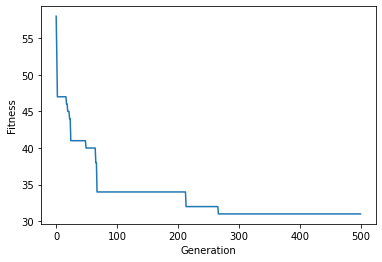

In [53]:
import matplotlib.pyplot as plt
import bisect
def reverse(l):
    return float(1) / float(l)

def genentic(iterations, population_number, mutation_rate, elite_size):
    print("D")
    population = first_population(population_number, n)
    print("SS")
    progress = []
    for i in range(iterations):

        print(i, fitness(population[0]), fitness(population[1]), end = '\r', flush=True)
        population.sort(key = fitness)
        progress.append(fitness(population[0]))
        child = []
        # moving elites to next generation
        for j in range(elite_size):
            child.append(population[j])
            
        # selection based on fitness(normalize fitness)
        select = []
        normalized_fitness = [(reverse(fitness(j))) for j in population]
        reversed(population)
        sum_fitness = sum(normalized_fitness)
        prefix_sum = [normalized_fitness[0]/sum_fitness]
        for k in range(1, len(population)):
            prefix_sum.append(prefix_sum[k-1] + float(normalized_fitness[k]) / float(sum_fitness))
            
        while(len(select) < population_number - elite_size):
            x = random.random() 
            select.append(population[bisect.bisect(prefix_sum, x)])
        
        # making new child from selected parents
        j = 0
        while (len(child) < population_number):
            child.append(cross_over(select[j], select[len(select) - 1 - j]))
            j = (j + 1) % len(select)
        # mutate next generation
        for j in range(elite_size, population_number):
            if (random.random() < mutation_rate):
                child[j] = mutation(child[j], mutation_rate)
        population = child
    
    population.sort(key = fitness)
    print(population[0], fitness(population[0]))
    
    plt.plot(progress)
    plt.ylabel('Fitness')
    plt.xlabel('Generation')
    plt.show()

n = 100
genentic(500, 10, 0.01, 2)

the best answer for n = 100 after 500 generations was 31! (31 tuple of queens attacking each other)

# Replace fitness of best neighbors with previous fitness function

D
SS
[33, 49, 58, 21, 89, 0, 98, 18, 37, 67, 46, 7, 88, 36, 68, 31, 3, 95, 30, 83, 51, 43, 90, 85, 50, 59, 4, 78, 38, 92, 34, 32, 97, 82, 72, 5, 19, 16, 29, 74, 28, 10, 69, 87, 15, 73, 40, 44, 80, 39, 11, 1, 17, 45, 35, 79, 75, 66, 77, 61, 65, 76, 70, 12, 23, 86, 96, 6, 9, 41, 52, 71, 24, 57, 25, 47, 62, 94, 81, 54, 93, 14, 8, 99, 13, 22, 63, 53, 48, 27, 26, 55, 2, 60, 56, 84, 64, 20, 91, 42] 8


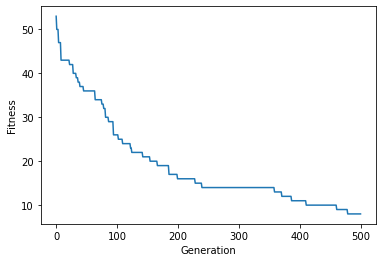

In [200]:
tabu = []
def local_search(best, chromosome):
    m = fitness(chromosome)
    res = -1
    for i in range(10):
        j = 0#(i+1)%len(chromosome)
        chromosome[i], chromosome[j] = chromosome[j], chromosome[i]
        f = fitness(chromosome)
        if f < best*2 and f < m:
            res = i
            m = f
        chromosome[i], chromosome[j] = chromosome[j], chromosome[i]
    cp = chromosome
    if res != -1:
        i = res
        j = 0#(i+1)%len(chromosome)
        
        chromosome[i], chromosome[j] = chromosome[j], chromosome[i]
        cp = chromosome.copy()
        chromosome[i], chromosome[j] = chromosome[j], chromosome[i]
    
    return res, cp


def mem_genentic(iterations, population_number, mutation_rate, elite_size):
    print("D")
    population = first_population(population_number, n)
    print("SS")
    progress = []
    for i in range(iterations):

        print(i, fitness(population[0]), fitness(population[1]), end = '\r', flush=True)
        
        population.sort(key = fitness)
        if fitness(population[0]) == 0:
            break
        progress.append(fitness(population[0]))
        child = []
        # moving elites to next generation
        for j in range(elite_size):
            child.append(population[j])
            
        # selection based on fitness(normalize fitness)
        select = []
        normalized_fitness = [(reverse(fitness(j))) for j in population]
        reversed(population)
        sum_fitness = sum(normalized_fitness)
        prefix_sum = [normalized_fitness[0]/sum_fitness]
        for k in range(1, len(population)):
            prefix_sum.append(prefix_sum[k-1] + float(normalized_fitness[k]) / float(sum_fitness))
            
        while(len(select) < population_number - elite_size):
            x = random.random() 
            select.append(population[bisect.bisect(prefix_sum, x)])
        
        # making new child from selected parents
        j = 0
        while (len(child) < population_number):
            r = random.randint(0, len(select)-1)
            child.append(cross_over(select[j], select[r]))#jlen(select) - 1 - j]))
            j = (j + 1) % len(select)
        # mutate next generation
        for j in range(elite_size, population_number):
            child[j] = mutation(child[j], mutation_rate)

        
        population = child
        for i in range(elite_size//2, len(population)):
            #print(child[i])
            best = progress[-1]
            r, x = local_search(best, population[i]) 
            #print(x)
            if r != -1 and (x not in tabu):
                #print("Better")
                #child.append(population[i])
                population = population[:i] + [x] + population[i+1:]
                tabu.append(x)
                
    population.sort(key = fitness)
    print(population[0], fitness(population[0]))
    
    plt.plot(progress)
    plt.ylabel('Fitness')
    plt.xlabel('Generation')
    plt.show()

n = 100
mem_genentic(500, 30, 0.002, 10)

D
SS
[70, 8, 79, 22, 27, 39, 51, 53, 38, 4, 82, 17, 83, 62, 42, 76, 68, 86, 45, 28, 0, 75, 26, 59, 89, 69, 13, 87, 57, 54, 48, 81, 1, 9, 72, 91, 74, 16, 21, 78, 24, 67, 63, 98, 7, 31, 3, 25, 2, 97, 71, 11, 14, 90, 36, 49, 44, 50, 93, 15, 19, 58, 5, 96, 37, 6, 33, 10, 12, 20, 41, 65, 30, 60, 23, 73, 66, 52, 94, 56, 95, 84, 43, 55, 32, 99, 85, 40, 34, 80, 92, 18, 47, 61, 46, 29, 77, 35, 64, 88] 5


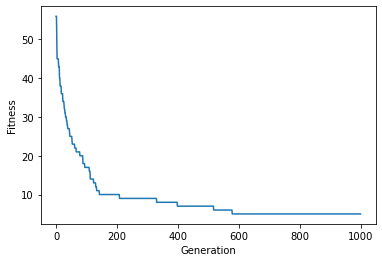

In [219]:
tabu = []
def local_search(best, chromosome):
    m = fitness(chromosome)
    res = -1
    for _ in range(10):
        i = random.randint(1, len(chromosome)-1)
        j = 0#(i+1)%len(chromosome)
        chromosome[i], chromosome[j] = chromosome[j], chromosome[i]
        f = fitness(chromosome)
        if f < best*2 and f < m:
            res = i
            m = f
        chromosome[i], chromosome[j] = chromosome[j], chromosome[i]
    cp = chromosome
    if res != -1:
        i = res
        j = 0#(i+1)%len(chromosome)
        
        chromosome[i], chromosome[j] = chromosome[j], chromosome[i]
        cp = chromosome.copy()
        chromosome[i], chromosome[j] = chromosome[j], chromosome[i]
    
    return res, cp


def mem_genentic(iterations, population_number, mutation_rate, elite_size):
    print("D")
    population = first_population(population_number, n)
    print("SS")
    progress = []
    for i in range(iterations):
        
        print(i, fitness(population[0]), fitness(population[1]), end = '\r', flush=True)
        population.sort(key = fitness)
        if fitness(population[0]) == 0:
            break
        progress.append(fitness(population[0]))
        child = []
        # moving elites to next generation
        for j in range(elite_size):
            child.append(population[j])
            
        # selection based on fitness(normalize fitness)
        select = []
        normalized_fitness = [(reverse(fitness(j))) for j in population]
        reversed(population)
        sum_fitness = sum(normalized_fitness)
        prefix_sum = [normalized_fitness[0]/sum_fitness]
        for k in range(1, len(population)):
            prefix_sum.append(prefix_sum[k-1] + float(normalized_fitness[k]) / float(sum_fitness))
            
        while(len(select) < population_number - elite_size):
            x = random.random() 
            select.append(population[bisect.bisect(prefix_sum, x)])
        
        # making new child from selected parents
        j = 0
        while (len(child) < population_number):
            r = random.randint(0, len(select)-1)
            child.append(cross_over(select[j], select[r]))#jlen(select) - 1 - j]))
            j = (j + 1) % len(select)
        # mutate next generation
        for j in range(elite_size, population_number):
            child[j] = mutation(child[j], mutation_rate)

        
        population = child
    
        for i in range(elite_size//2, len(population)):
            #print(child[i])
            best = progress[-1]
            r, x = local_search(best, population[i]) 
            #print(x)
            if r != -1 and (x not in tabu):
                #print("Better")
                #child.append(population[i])
                population = population[:i] + [x] + population[i+1:]
                tabu.append(x)
                
    population.sort(key = fitness)
    print(population[0], fitness(population[0]))
    
    plt.plot(progress)
    plt.ylabel('Fitness')
    plt.xlabel('Generation')
    plt.show()

n = 100
mem_genentic(1000, 20, 0.02, 8)

D
SS
[77, 46, 71, 87, 51, 59, 63, 73, 42, 35, 48, 15, 5, 32, 45, 83, 62, 16, 6, 47, 85, 31, 74, 28, 67, 96, 39, 11, 0, 24, 4, 75, 14, 82, 1, 26, 72, 33, 86, 68, 54, 19, 12, 49, 94, 84, 66, 10, 34, 70, 25, 20, 93, 50, 55, 17, 91, 40, 98, 3, 92, 7, 22, 57, 37, 81, 78, 97, 60, 18, 88, 69, 89, 13, 99, 29, 79, 53, 36, 58, 95, 61, 43, 2, 52, 8, 27, 64, 23, 76, 90, 44, 30, 9, 65, 21, 38, 56, 41, 80] 0


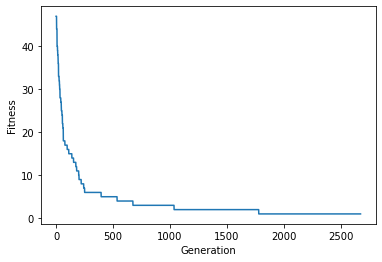

In [252]:
def attack(a, b, M):
    return (M[a] - a == M[b] - b) or (M[a] + a) == (M[b] + b)
        
def fitness2(chromosome):
    w = 0
    vis = []
    for i in range(len(chromosome)):

        for j in range(i+1, len(chromosome)):
            if attack(i, j, chromosome):
                #print(i, j)
                w += 1
                if ((i,j) not in vis):
                    vis.append((i,j))
    return w, vis

tabu = []
def local_search(best, chromosome):
    pre = chromosome.copy()
    m = fitness(chromosome)
    res = -1
    for _ in range(10):
        i = random.randint(1, len(chromosome)-1)
        j = 0#(i+1)%len(chromosome)
        chromosome[i], chromosome[j] = chromosome[j], chromosome[i]
        f = fitness(chromosome)
        if f < best*2 and f < m:
            res = i
            m = f
        chromosome[i], chromosome[j] = chromosome[j], chromosome[i]
    
    cp = chromosome
    
    if m < 20 and res == -1:
        for i in range(10):
            chromosome = pre[i:] + pre[0:i]
            f = fitness(chromosome)
            if f < best*2 and f < m:
                res = i
                m = f
        chromosome = pre
        if res != -1:
            cp = pre[res:] + pre[0:res]
            
    elif res != -1:
        i = res
        j = 0#(i+1)%len(chromosome)
        
        chromosome[i], chromosome[j] = chromosome[j], chromosome[i]
        cp = chromosome.copy()
        chromosome[i], chromosome[j] = chromosome[j], chromosome[i]
    
    return res, cp


def mem_genentic(iterations, population_number, mutation_rate, elite_size):
    print("D")
    population = first_population(population_number, n)
    print("SS")
    progress = []
    for i in range(iterations):
        
        print(i, fitness(population[0]), fitness(population[1]), end = '\r', flush=True)
        population.sort(key = fitness)
        if fitness(population[0]) == 0:
            break
        progress.append(fitness(population[0]))
        child = []
        # moving elites to next generation
        for j in range(elite_size):
            child.append(population[j])
            
        # selection based on fitness(normalize fitness)
        select = []
        normalized_fitness = [(reverse(fitness(j))) for j in population]
        reversed(population)
        sum_fitness = sum(normalized_fitness)
        prefix_sum = [normalized_fitness[0]/sum_fitness]
        for k in range(1, len(population)):
            prefix_sum.append(prefix_sum[k-1] + float(normalized_fitness[k]) / float(sum_fitness))
            
        while(len(select) < population_number - elite_size):
            x = random.random() 
            select.append(population[bisect.bisect(prefix_sum, x)])
        
        # making new child from selected parents
        j = 0
        while (len(child) < population_number):
            r = random.randint(0, len(select)-1)
            child.append(cross_over(select[j], select[r]))#jlen(select) - 1 - j]))
            j = (j + 1) % len(select)
        # mutate next generation
        for j in range(elite_size, population_number):
            child[j] = mutation(child[j], mutation_rate)

        
        population = child
        for i in range(elite_size//2, len(population)):
            #print(child[i])
            best = progress[-1]
            r, x = local_search(best, population[i]) 
            #print(x)
            if r != -1 and (x not in tabu):
                #print("Better")
                #child.append(population[i])
                population = population[:i] + [x] + population[i+1:]
                tabu.append(x)
                
    population.sort(key = fitness)
    print(population[0], fitness(population[0]))
    
    plt.plot(progress)
    plt.ylabel('Fitness')
    plt.xlabel('Generation')
    plt.show()

n = 100
mem_genentic(500000, 20, 0.02, 8)

in about 2500 iterations the answer for n = 100 have been found. the neghibors were first swaping the index 0 with other indexes(10 of them randomly) then in the last iterations i add the i cyclic shifts to them for having more vriety in the neighbors... (here i replaced the better neighbors that are not in tabu list)